> Welcome to the project! You will find tips in quoted sections like this to help organize your approach to your investigation.

# Project: Investigate a Pima Indians Diabetes Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#pre">Prediction analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> Diabetes is one of the deadliest diseases in the world. It is not only a disease but also creator of different kinds of diseases like heart attack, blindness etc. The normal identifying process is that patients need to visit a diagnostic center, consult their doctor, and sit tight for a day or more to get their reports. So, the objective of this project is to identify whether the patient has diabetes or not based on diagnostic measurements.. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.
>
> The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

> About Dataset:

>> Pregnancies: No. of times pregnant

>> Glucose: Plasma Glucose Concentration (mg/dl)

>> Blood Pressure: Diastolic Blood Pressure(mmHg)

>> Skin Thickness:A value used to estimate body fat. Normal Triceps SkinFold Thickness in women is 23mm. Higher thickness leads to obesity and chances of diabetes increases.

>> Insulin: 2-Hour Serum Insulin (mu U/ml)

>> BMI: Body Mass Index (weight in kg/ height in m2)

>> Diabetes Pedigree Function: It provides information about diabetes history in relatives and genetic relationship of those relatives with patients. Higher Pedigree Function means patient is more likely to have diabetes.

>> Age:Age (years)

>> Outcome: Class Variable (0 or 1) where ‘0’ denotes patient is not having diabetes and ‘1’ denotes patient having diabetes.

In [473]:
# Use this cell to set up import statements for all of the packages that you plan to use.

import warnings
import matplotlib.pyplot as plt

%matplotlib qt

import pandas as pd
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import missingno as ms
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
warnings.simplefilter(action="ignore")
%matplotlib inline

In [474]:
# Load your data and print out a few lines. 

df = pd.read_csv("diabetes.csv")
df.head(7)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1


In [475]:
# see the column names and its datatypes 
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [476]:
#converting to float to be accurate 

df = df.astype('float64')
print(df.dtypes)


Pregnancies                 float64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                         float64
Outcome                     float64
dtype: object


# Cleaning data 

In [477]:
#data cleaning
#there is no missing values but there are many zeros 
#get sum of zero values in each column
numOfZeros = df.columns
myarr = (df[numOfZeros] == 0).sum()
print(myarr)

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


# Handling data cleaning 
*skin thickness , insulin have large number of  zero values  , will handle them later 
*i can not drop these values because the data is not large 
*glucose, blood pressure, BMI has small number of zero values , will handle them later 


In [478]:
#replace zeros with NaN to not affect the mean
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)


In [479]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

<AxesSubplot:>

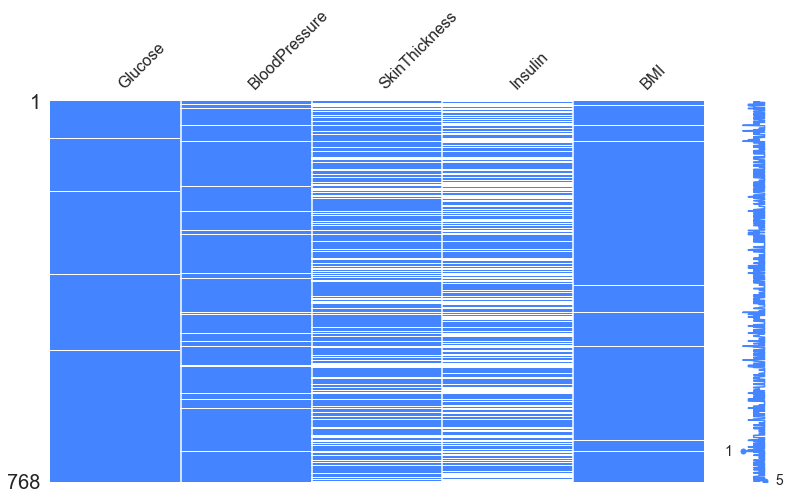

In [480]:
ms.matrix(df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] , figsize=(13,7) , color=(0.27, 0.52, 1.0))

# Conclusion :
skin thickness , blood pressure and insuline have very large number of NaN values will change them 
BMI Blood pressure Glucose have small number of NaN values so will replace it with median we dont have to ovserve their relationships with respect to other columns 

# exploring how will replace NaN values 
to see if clearly one coloumn has an impact on other so while changing NaN values , replace them with logical values based on evidence

<AxesSubplot:>

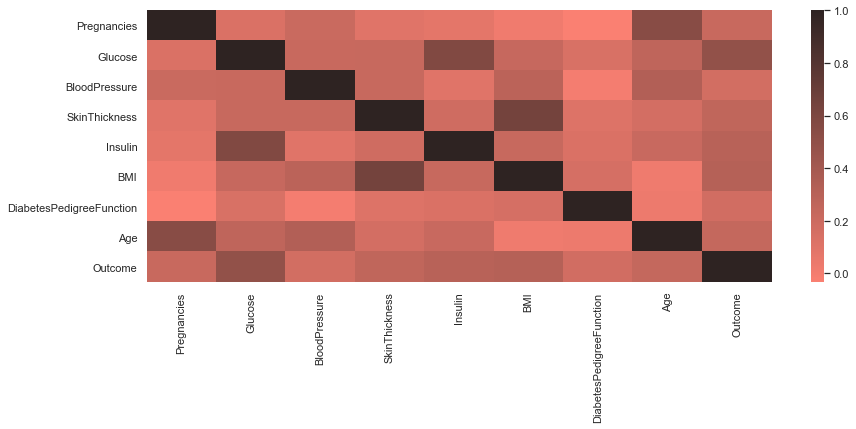

In [481]:
#get relationship between columns 
sns.set(rc={'figure.figsize': (14, 5)})
 
# assign data
ind_var = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin ', 'BMI',
           'DiabetesPedigreeFunction', 'Age', 'Outcome']
 
# illustrate heat map.
sns.heatmap(df.select_dtypes(include='number').corr(),
            cmap=sns.color_palette("dark:salmon_r", as_cmap=True))


# handling Glucose , BMI , Blood pressure 


# conclusion on relationship between columns 
There is a relation between glucose and insulin , as glucose increase insulin increase as well as skin thickness and BMI
Definetly there is relation between age and pregnancies but i do not see it logical to assume a women is pregnant while she is not 


In [482]:
#converting the null values with the median of that column becuase it is not worth it to observe a relation between them and others columns because they have few number of NaN values
# asa a result will replace them with median 
df['BMI'].fillna(df['BMI'].median(), inplace =True)

df['Glucose'].fillna(df['Glucose'].median(), inplace =True)

df['BloodPressure'].fillna(df['BloodPressure'].median(), inplace =True)



In [483]:
#there is a relation between glucose and insulin so will replace them according to other columns 
by_Glucose_Age_Insulin_Grp = df.groupby(['Glucose'])

def fill_Insulin(series):
    return series.fillna(series.median())
df['Insulin'] = by_Glucose_Age_Insulin_Grp['Insulin'].transform(fill_Insulin)

In [484]:
df['Insulin'] = df['Insulin'].fillna(df['Insulin'].mean() )

In [485]:
#there is a relation between skin thickness and bmi
by_BMI_Insulin = df.groupby(['BMI'])

def fill_Skinthickness(series):
    return series.fillna(series.mean())
df['SkinThickness'] = by_BMI_Insulin['SkinThickness'].transform(fill_Skinthickness)

In [486]:
df['SkinThickness'].fillna(df['SkinThickness'].mean(),inplace= True)

In [487]:
#until now there is no zeros we will check for nulls 
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<AxesSubplot:xlabel='Outcome', ylabel='count'>

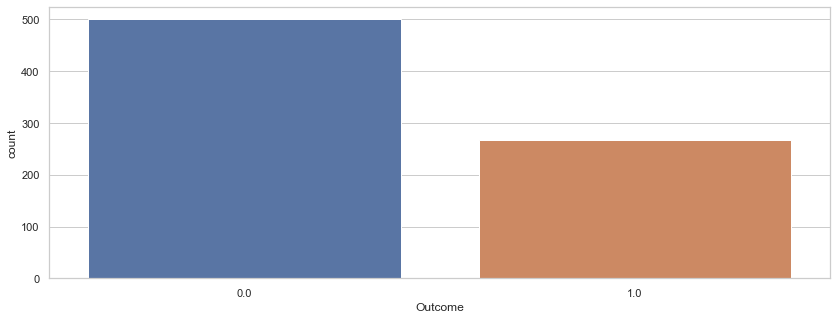

In [488]:

sns.set_style('whitegrid')
sns.countplot(x='Outcome',data=df)
#conclusion : postive diabetic people number is almost half of non diabetec

In [489]:
#see examlpe of data after modifying
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.000000,277.500000,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.000000,49.000000,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,28.614922,148.888587,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.000000,94.000000,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.000000,168.000000,43.1,2.288,33.0,1.0


## Build a Prediction Model
### Research Question 2  (Replace this header name!)

In [490]:
# Make a feature scaling by default between 0 and 1

min_max_scaler = MinMaxScaler()

(df[["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI",
           "DiabetesPedigreeFunction", "Age"]]) = min_max_scaler.fit_transform(df[["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI",
           "DiabetesPedigreeFunction", "Age"]])


 

In [491]:
#see example of data after scaling
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.670968,0.489796,0.304348,0.316707,0.314928,0.234415,0.483333,1.0
1,0.058824,0.264516,0.428571,0.239130,0.042067,0.171779,0.116567,0.166667,0.0
2,0.470588,0.896774,0.408163,0.234945,0.162126,0.104294,0.253629,0.183333,1.0
3,0.058824,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000,0.0
4,0.000000,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000,1.0


# Training and testing data

In [492]:
#to retrieve rows from a Data frame.
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [493]:
# Split the data into train and test data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 0)


## Compare the performance (Confusion matrix and classification report) of different classifiers (LR, KNN, SVM, DT and RF)

> **Note: use grid search with a suitable range of values to adjust the hyperparameters of DT and SVM and for loop to adjust the k value of KNN**

# KNN

Text(0.5, 1.0, 'Error Rate and K-value')

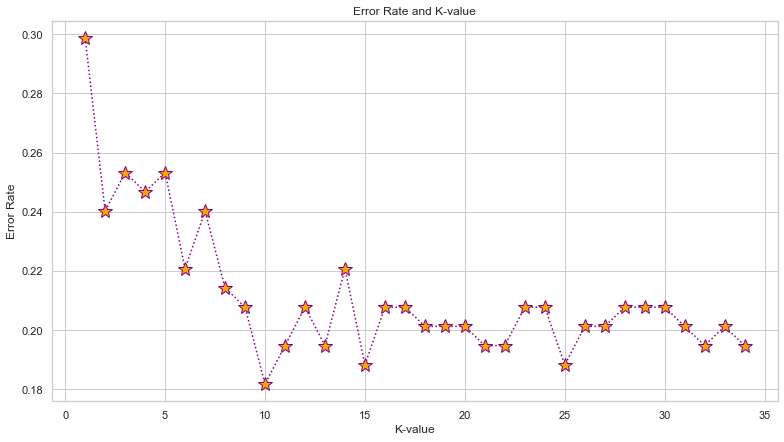

In [494]:
#KNN
err_rates = []

for trial in range(1,35):
    knn = KNeighborsClassifier(n_neighbors = trial)
    knn.fit(x_train, y_train)
    pred_idx = knn.predict(x_test)
    err_rates.append(np.mean(pred_idx != y_test))

    #plot the data
plt.figure(figsize = (13,7))
plt.plot(range(1,35), err_rates, linestyle = 'dotted', color = 'purple', marker = '*', markerfacecolor = 'orange',markersize=15)
plt.xlabel('K-value')
plt.ylabel('Error Rate')
plt.title('Error Rate and K-value')




In [495]:
myKNN = KNeighborsClassifier(n_neighbors = 27)
myKNN.fit(x_train,y_train)
knn_predictions = myKNN.predict(x_test)
#calculate confusion matrix and classification 
print(confusion_matrix(y_test, knn_predictions))
print(classification_report(y_test,knn_predictions))

[[95 12]
 [19 28]]
              precision    recall  f1-score   support

         0.0       0.83      0.89      0.86       107
         1.0       0.70      0.60      0.64        47

    accuracy                           0.80       154
   macro avg       0.77      0.74      0.75       154
weighted avg       0.79      0.80      0.79       154



# SVC

In [496]:
from sklearn.svm import SVC

model=SVC(kernel='rbf')
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

accuracy_score(y_test,y_pred)

0.7857142857142857

In [497]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

[[97 10]
 [23 24]]
              precision    recall  f1-score   support

         0.0       0.81      0.91      0.85       107
         1.0       0.71      0.51      0.59        47

    accuracy                           0.79       154
   macro avg       0.76      0.71      0.72       154
weighted avg       0.78      0.79      0.77       154



# Random Forest

In [498]:
from sklearn.ensemble import RandomForestClassifier

classi=RandomForestClassifier()
classi.fit(x_train,y_train)
RandomForestClassifier()
y_pred=classi.predict(x_test)
accuracy_score(y_test,y_pred)



0.7857142857142857

In [499]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

[[92 15]
 [18 29]]
              precision    recall  f1-score   support

         0.0       0.84      0.86      0.85       107
         1.0       0.66      0.62      0.64        47

    accuracy                           0.79       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.78      0.79      0.78       154



# Logistic Regression

In [500]:
logmodel = LogisticRegression(solver='lbfgs', max_iter=1000)
logmodel.fit(x_train,y_train)
lr_predictions = logmodel.predict(x_test)
y_pred=classifier.predict(x_test)
accuracy_score(y_test,y_pred)



0.7857142857142857

In [501]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

[[94 13]
 [20 27]]
              precision    recall  f1-score   support

         0.0       0.82      0.88      0.85       107
         1.0       0.68      0.57      0.62        47

    accuracy                           0.79       154
   macro avg       0.75      0.73      0.74       154
weighted avg       0.78      0.79      0.78       154



# Decision Tree

In [502]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(x_train,y_train)
dt_predictios = dtree.predict(x_test)
y_pred=classifier.predict(x_test)
accuracy_score(y_test,y_pred)



0.7857142857142857

In [503]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

[[94 13]
 [20 27]]
              precision    recall  f1-score   support

         0.0       0.82      0.88      0.85       107
         1.0       0.68      0.57      0.62        47

    accuracy                           0.79       154
   macro avg       0.75      0.73      0.74       154
weighted avg       0.78      0.79      0.78       154



<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work send it and Congratulations!

KNN 
i tried different values for neighbors from 1 to 35
accuracyy = 0.80

SVC accuracy score=0.785
Random Forest accuracy score = 0.805
Logestic Regression = 0.792
Decision tree = 0.792

The best accuracy score is random forest and the worst is SVC
Logestic Regression and Decision tree are almost the same  


By exploring the data there is a CLEAR relation between glucose and inslune as well as skin thickness and BMI

The main reasons is high glucose level as it consume the definite amount of inslune 
that pancrease can give due to the whole life time
The second reason is HIGH BMI which is a result of skin thickness due to large  amount of fats 
which conclude that Pima Indians have bad lifestyle

Outcome : Diabetic people is almost 250 , and non diabetic is almost 500 
    which is the half and it is a bad indication about Pima Indians healthcare